Original DataFrame:
               Population       GDP  Life_Expectancy
Country Year                                       
USA     2021   331000000  21000000             78.5
        2022   332000000  21500000             79.1
China   2021  1440000000  16000000             76.4
        2022  1450000000  16500000             77.1
Germany 2021    83000000   4200000             81.2
        2022    82100000   4220000             81.3

Pandas stats:
Population mean: 619683333.3333334
GDP sum: 83420000
Max Life Expectancy: 81.3
Min Population: 82100000

NumPy stats:
Population std: 592377949.2201092
GDP mean: 13903333.333333334
GDP total (np.sum): 83420000

GDP after 10% increase:
                    GDP  GDP_10pct_inc
Country Year                         
USA     2021  21000000     23100000.0
        2022  21500000     23650000.0
China   2021  16000000     17600000.0
        2022  16500000     18150000.0
Germany 2021   4200000      4620000.0
        2022   4220000      4642000.0

DataFra

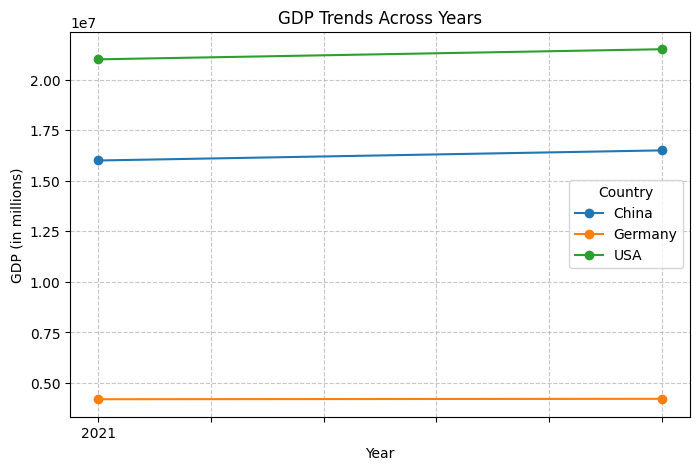

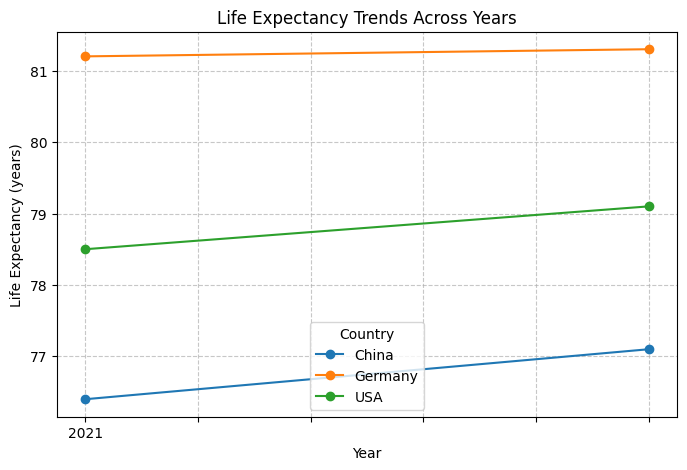

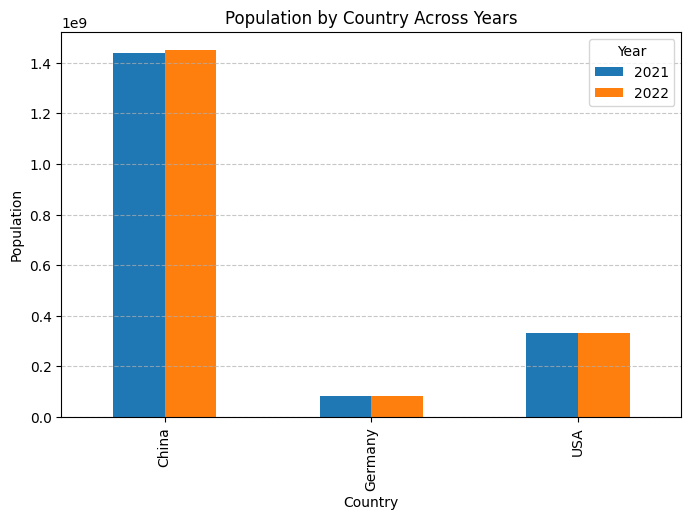

In [1]:
import pandas as pd
import numpy as np

# --------------------------
# Create Dataset
# --------------------------
data = {
    ("USA", "2021"): [331000000, 21000000, 78.5],
    ("USA", "2022"): [332000000, 21500000, 79.1],
    ("China", "2021"): [1440000000, 16000000, 76.4],
    ("China", "2022"): [1450000000, 16500000, 77.1],
    ("Germany", "2021"): [83000000, 4200000, 81.2],
    ("Germany", "2022"): [82100000, 4220000, 81.3],
}

# Convert to DataFrame with MultiIndex
index = pd.MultiIndex.from_tuples(data.keys(), names=["Country", "Year"])
df = pd.DataFrame(list(data.values()), index=index, columns=["Population", "GDP", "Life_Expectancy"])

print("Original DataFrame:\n", df)

# --------------------------
# 1. Summary Statistics
# --------------------------
print("\nPandas stats:")
print("Population mean:", df["Population"].mean())
print("GDP sum:", df["GDP"].sum())
print("Max Life Expectancy:", df["Life_Expectancy"].max())
print("Min Population:", df["Population"].min())

print("\nNumPy stats:")
print("Population std:", np.std(df["Population"]))
print("GDP mean:", np.mean(df["GDP"]))
print("GDP total (np.sum):", np.sum(df["GDP"]))

# --------------------------
# 2. Increase GDP by 10%
# --------------------------
df["GDP_10pct_inc"] = df["GDP"] * 1.10
print("\nGDP after 10% increase:\n", df[["GDP", "GDP_10pct_inc"]])

# --------------------------
# 3. Swap index levels
# --------------------------
df_swapped = df.swaplevel("Country", "Year").sort_index(level="Year")
print("\nDataFrame with swapped index (sorted by Year):\n", df_swapped)

# --------------------------
# 4. Unstack by Year
# --------------------------
df_unstacked = df.unstack(level="Year")
print("\nUnstacked DataFrame (Year as columns):\n", df_unstacked)

# Example: compare GDP across years for each country
print("\nGDP comparison across years:\n", df_unstacked["GDP"])

# --------------------------
# 5. Easy retrieval with hierarchical indexing
# --------------------------
# Example: Population trend for China across years
print("\nPopulation trend for China:\n", df.loc["China", "Population"])

# Example: GDP and Life Expectancy trend for USA
print("\nUSA trend:\n", df.loc["USA", ["GDP", "Life_Expectancy"]])
import matplotlib.pyplot as plt

# --------------------------
# Line plot: GDP trends per country
# --------------------------
df_unstacked["GDP"].T.plot(kind="line", marker="o", figsize=(8,5))
plt.title("GDP Trends Across Years")
plt.xlabel("Year")
plt.ylabel("GDP (in millions)")
plt.legend(title="Country")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# --------------------------
# Line plot: Life Expectancy trends per country
# --------------------------
df_unstacked["Life_Expectancy"].T.plot(kind="line", marker="o", figsize=(8,5))
plt.title("Life Expectancy Trends Across Years")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.legend(title="Country")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# --------------------------
# Bar plot: Population comparison across years
# --------------------------
df_unstacked["Population"].plot(kind="bar", figsize=(8,5))
plt.title("Population by Country Across Years")
plt.xlabel("Country")
plt.ylabel("Population")
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
